In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [156]:
df = pd.read_csv("cars.csv")
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [157]:
# to check shape of the dataset
df.shape

(56244, 12)

In [158]:
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [159]:
# dropping unnecssary tables from the dataset for the anaylsis
df.drop(columns = ['model','segment'], inplace=True)

In [160]:
# to find the unique values in the columns 
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [161]:
# gives me all knind of makes/types from the dataset
# it can be done for all the columns 
print(df['make'].unique())
print("colors")
print(df['color'].unique())


['mazda' 'mg' 'renault' 'gaz' 'aro' 'rover' 'uaz' 'alfa-romeo' 'audi'
 'oldsmobile' 'saab' 'peugeot' 'chrysler' 'wartburg' 'moskvich' 'volvo'
 'fiat' 'roewe' 'porsche' 'zaz' 'luaz' 'dacia' 'lada-vaz' 'izh' 'raf'
 'bogdan' 'bmw' 'nissan' 'mercedes-benz' 'mitsubishi' 'toyota' 'chery'
 'gmc' 'hyundai' 'honda' 'ssangyong' 'suzuki' 'opel' 'seat' 'volkswagen'
 'daihatsu' 'chevrolet' 'geely' 'saturn' 'kia' 'lincoln' 'eksklyuziv'
 'citroen' 'dong-feng' 'pontiac' 'ford' 'subaru' 'bentley' 'faw'
 'cadillac' 'lifan' 'plymouth' 'hafei' 'shanghai-maple' 'mini' 'jeep'
 'skoda' 'mercury' 'changan' 'lexus' 'isuzu' 'aston-martin' 'lancia'
 'great-wall' 'land-rover' 'jaguar' 'buick' 'daewoo' 'vortex' 'infiniti'
 'byd' 'smart' 'maserati' 'haval' 'acura' 'scion' 'tata' 'datsun' 'tesla'
 'mclaren' 'ravon' 'trabant' 'proton' 'fso' 'jac' 'asia' 'iran-khodro'
 'zotye' 'tagaz' 'saipa' 'brilliance']
colors
['burgundy' 'black' 'silver' 'white' 'gray' 'blue' 'other' 'purple' 'red'
 'green' 'brown' 'yellow' 'orang

Since there are many cars, it is difficult to analyze them so i will group them into categories:
Luxury European, Mainstream European, Russina/ Eastern European, Asian, American, Speciality, and Other.

In [162]:
#categorizing the car make according to the categoires
def car_make(make):
    if make in['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European' 
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    # this below functions is used for creating a column (car_segment) to display the categories in the dataets
df['make_segment'] = df['make'].apply(car_make)

In [163]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [164]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


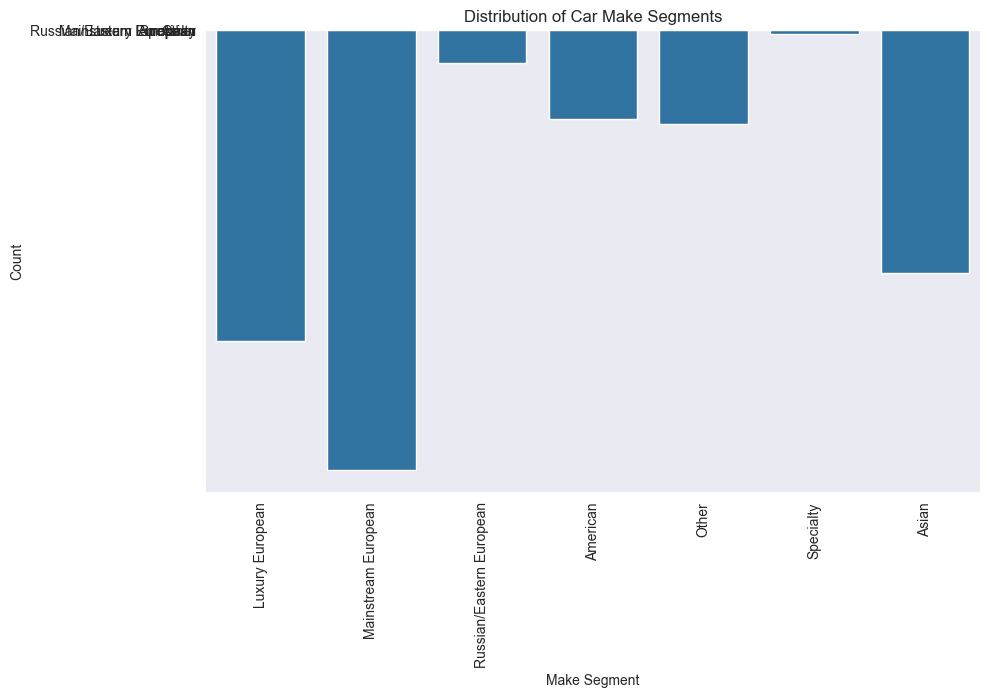

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with a column 'make_segment'
plt.figure(figsize=(10, 6))
sns.barplot(x='make_segment', y='make_segment', data=df, estimator=len)

plt.title('Distribution of Car Make Segments')
plt.xlabel('Make Segment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Categorical variable Distribution


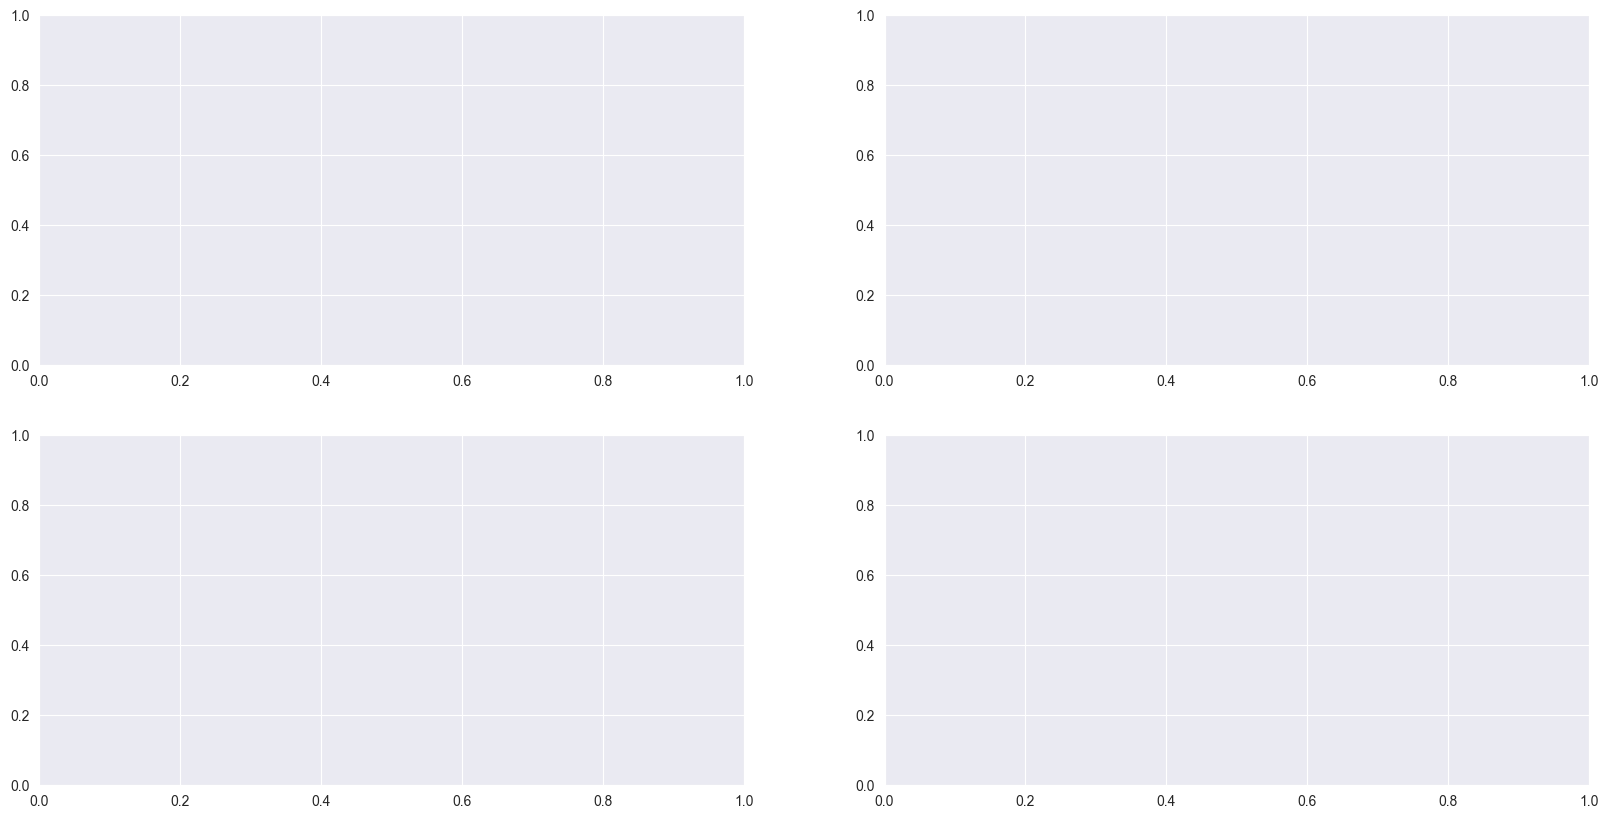

In [166]:
# creates empty the 2x2 matrix graphs with empty values
fig, ax = plt.subplots(2,2,figsize=(20,10))


<Axes: xlabel='make_segment', ylabel='count'>

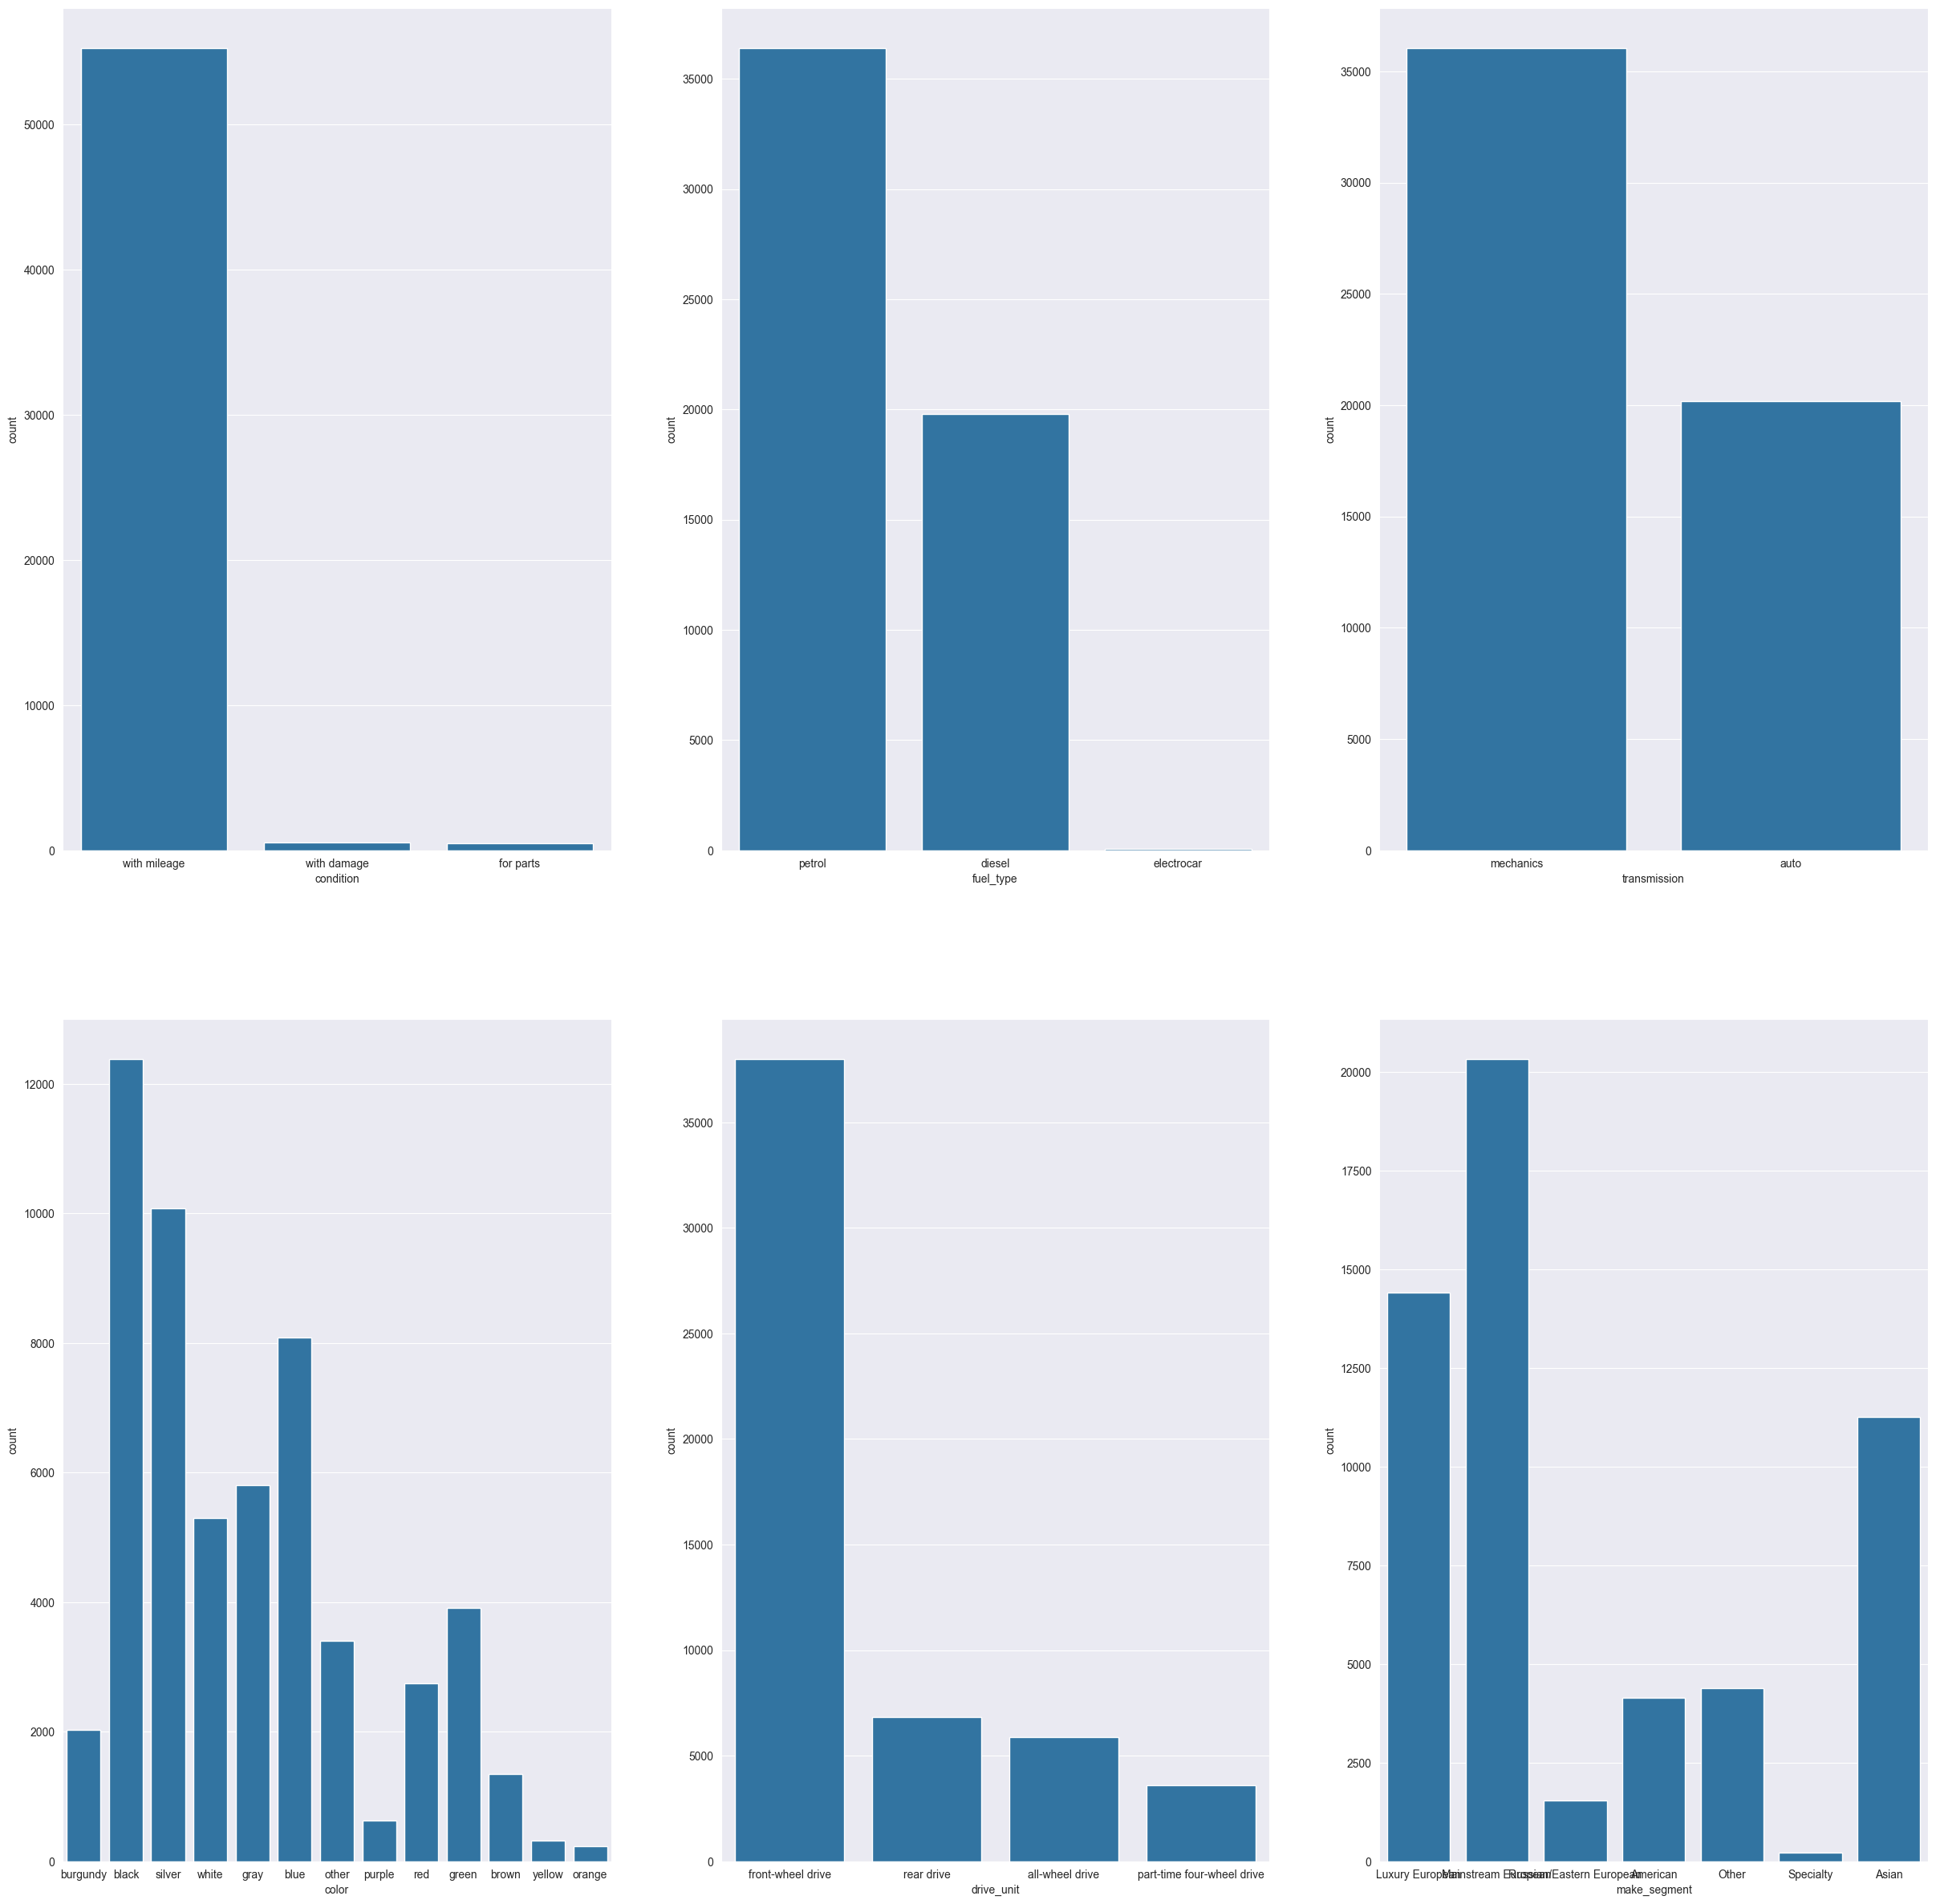

In [167]:
fig, ax = plt.subplots(2,3,figsize=(30,30))
# plots the graph acc to axis the data from df
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
sns.countplot(x='make_segment', data=df, ax=ax[1,2])

Continous variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

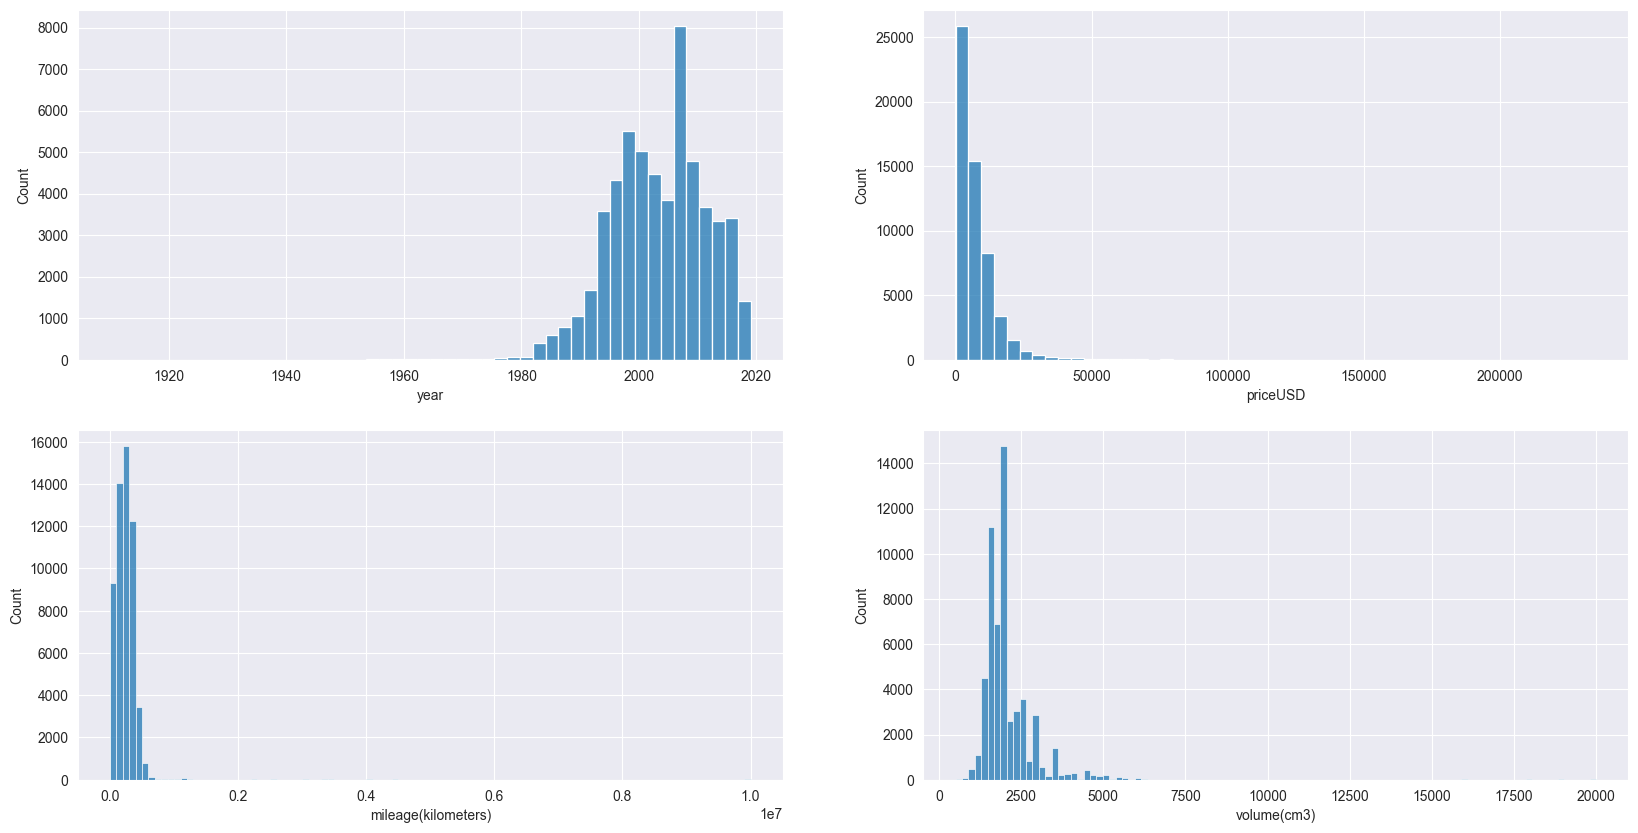

In [168]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0],bins=50)
sns.histplot(df['priceUSD'],ax=ax[0,1],bins=50)
sns.histplot(df['mileage(kilometers)'],ax=ax[1,0],bins =100)
sns.histplot(df['volume(cm3)'],ax=ax[1,1],bins=100)


In [169]:
df = df[df['year']>1980]


Price and Make


In [170]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demof = demodf.sort_values(by='priceUSD',ascending=False).head(10)

# This code is performing the following operations:
#It groups the original dataframe df by the 'make' column.
#For each group (i.e., each unique car make), it calculates the mean of the 'priceUSD' column.
#The result is reset to a new dataframe demodf with two columns: 'make' and 'priceUSD' (which now contains the mean prices).
#The demodf is then sorted by the 'priceUSD' column in descending order (highest price first).
#Finally, it selects only the top 10 rows using .head(10).
#demodf = df.groupby('make')['priceUSD'].mean().reset_index()

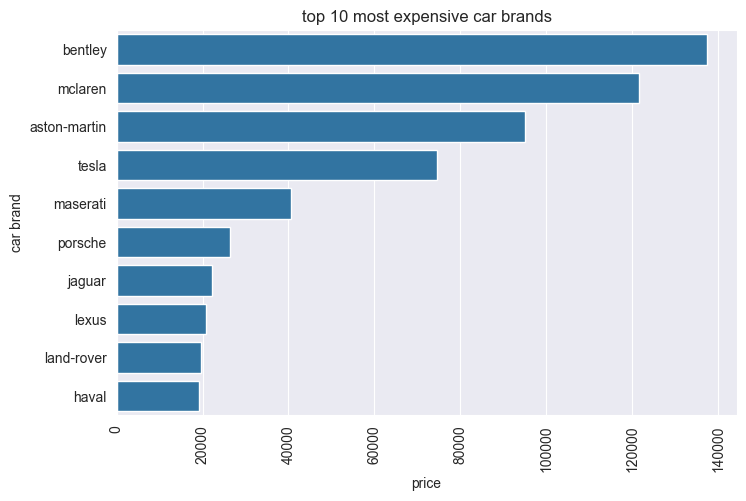

In [171]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demof = demodf.sort_values(by='priceUSD',ascending=False).head(10)

#bar plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demof)
plt.xticks(rotation=90)
plt.title("top 10 most expensive car brands")
plt.xlabel("price")
plt.ylabel("car brand")
plt.show()

Price and Condition

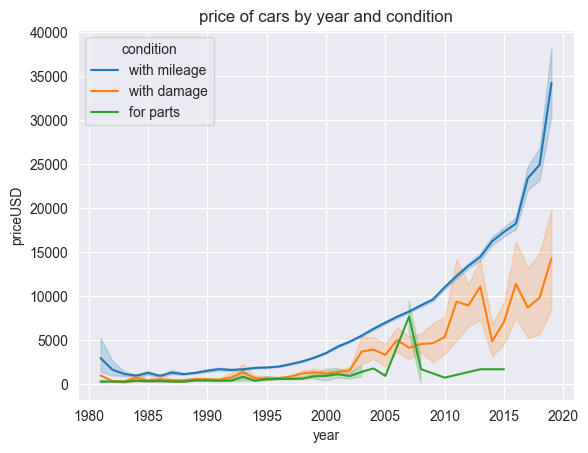

In [172]:
sns.lineplot(x='year', y='priceUSD', data=df, hue = 'condition')
plt.title("price of cars by year and condition")
plt.show()

Price and Transmission


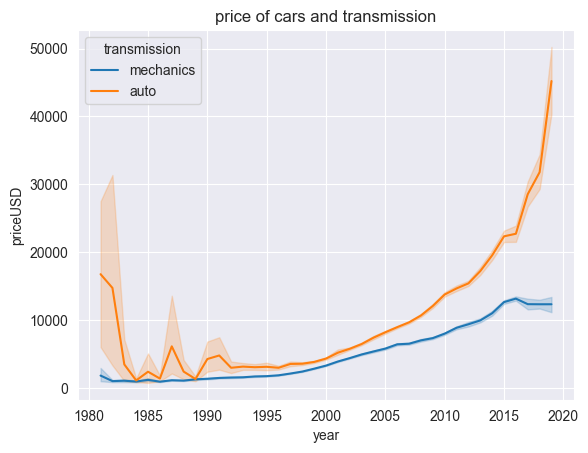

In [173]:
sns.lineplot(x = 'year', y='priceUSD', data=df, hue = 'transmission')
plt.title("price of cars and transmission")
plt.show()

Price and Fuel_type


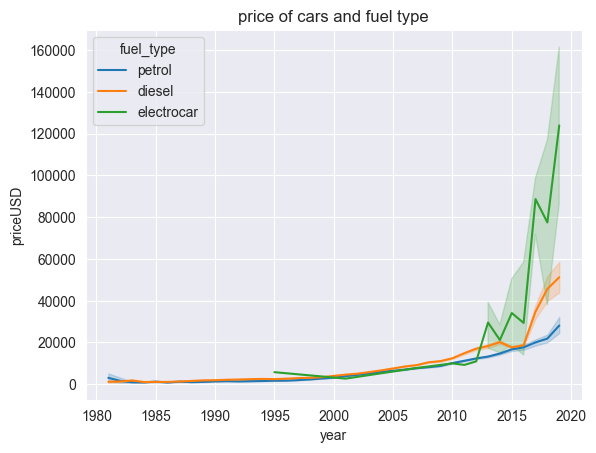

In [174]:
sns.lineplot(x = 'year', y = 'priceUSD',data = df,hue = 'fuel_type')
plt.title("price of cars and fuel type")
plt.show()

Price and drive_unit

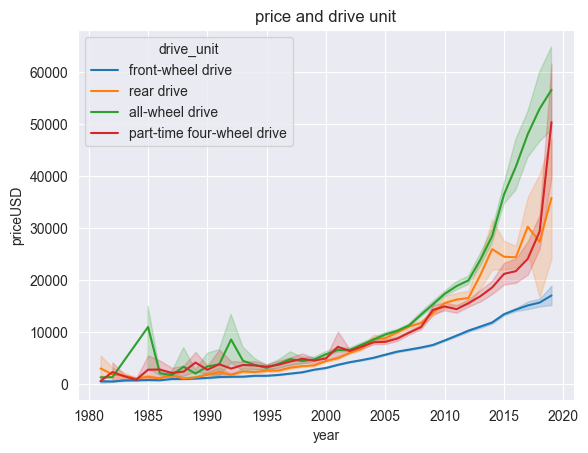

In [175]:
sns.lineplot(x='year', y='priceUSD', data=df, hue='drive_unit')
plt.title("price and drive unit")
plt.show()

Price and Brand Segment

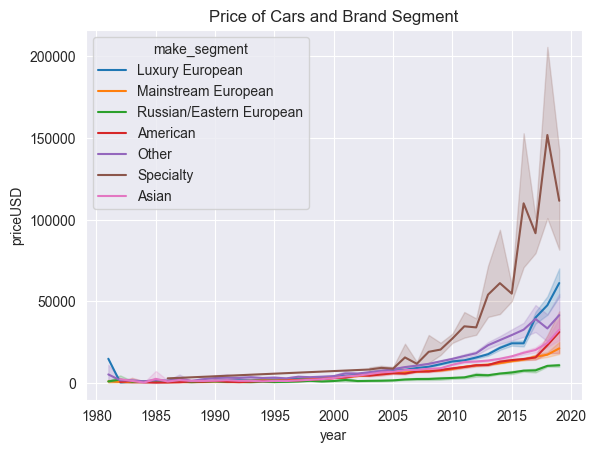

In [176]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

Data Preprocessing Part 2


In [177]:
#gives the no of null values totally 
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [178]:
# drops the null values from the columns
df.dropna(inplace=True)

In [179]:
df.isnull().sum()

make                   0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
make_segment           0
dtype: int64

In [180]:
#to drop null values from the columns(make)
df.drop(columns=['make'], inplace=True)

In [181]:
df.isnull().sum()

priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
make_segment           0
dtype: int64

Label encoding for object data type

In [182]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object is created
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())


condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


Correlation Matrix Heatmap

<Axes: >

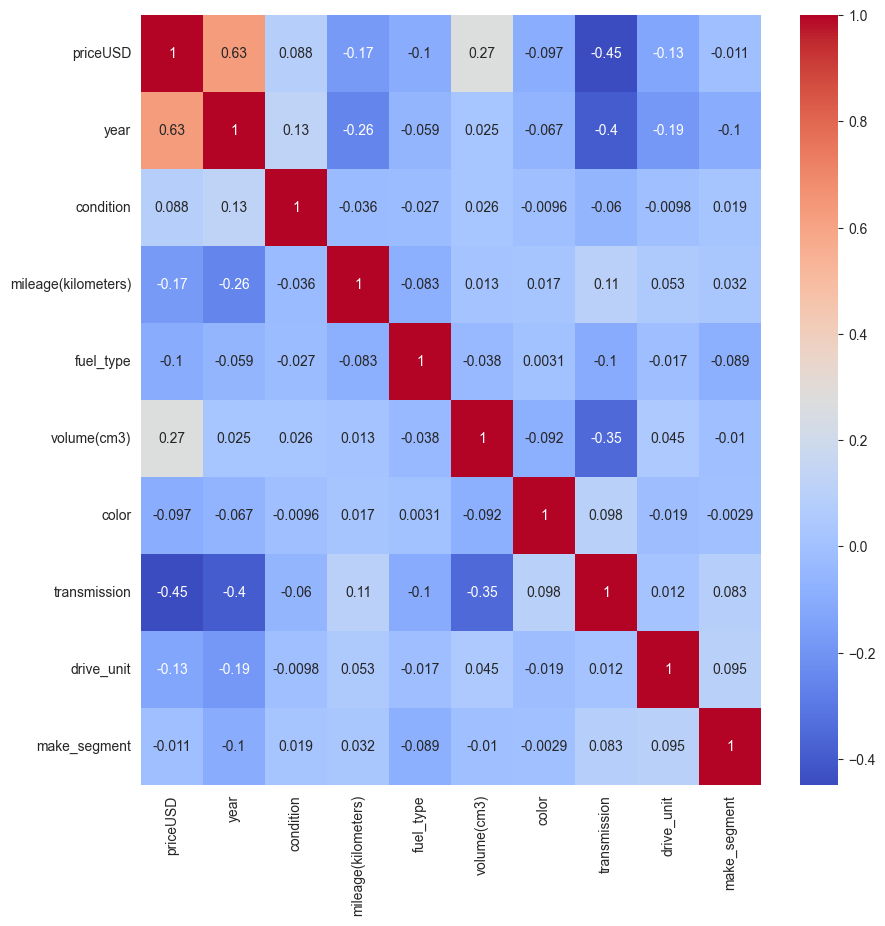

In [183]:
#sns.heatmap(): Creates the heatmap using seaborn.
#df.corr(): The correlation matrix to visualize.
#annot=True: Adds numerical annotations to each cell.
#cmap='coolwarm': Sets the color scheme (blue for negative correlations, red for positive).
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Outlier Removal

Removing outliers is a data preprocessing technique used to eliminate extreme values from a dataset that may skew analysis or model performance.

method for removing Outlier
Z-score method: Removes data points that are a certain number of standard deviations away from the mean.



In [184]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

Train Test Split

Train-test split is an important technique in machine learning for evaluating model performance. 

In [185]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']),df['priceUSD'], test_size=0.2, random_state=42)

Model Building

Decision Tree Regressor

How It Works
The model splits the data into subsets based on feature values, creating a tree-like structure.
At each node, it chooses the feature and split point that minimizes the variance in the target variable.
The process continues recursively until a stopping criterion is met (e.g., maximum depth reached).
Predictions are made by traversing the tree and using the average target value in the leaf node.


GridSearchCV

GridSearchCV is a powerful tool for hyperparameter tuning in machine learning models. Here are the key points about using GridSearchCV for hyperparameter tuning:

How GridSearchCV Works
GridSearchCV performs an exhaustive search over a specified parameter grid.
It trains the model using every combination of parameters in the grid.
Each model is evaluated using cross-validation.
The best performing parameter combination is selected.

Hyperparameter Tuning

Important hyperparameters to consider:
max_depth: Controls the maximum depth of the tree
min_samples_split: Minimum number of samples required to split a node
min_samples_leaf: Minimum number of samples required in a leaf node
Tuning these parameters helps balance model complexity and performance.

In [186]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(x_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
352 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create the base model
dtr = DecisionTreeRegressor()

# Parameters for grid search
params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto', added None
    'random_state': [0, 42]
}

#This creates a GridSearchCV object:
#estimator=dtr: The model to use
#param_grid=params: The hyperparameter grid
#cv=5: Use 5-fold cross-validation
   #Cross-validation is a statistical method used to evaluate machine-
   #learning models by testing them on multiple subsets of data
#verbose=1: Print progress
#n_jobs=-1: Use all available CPU cores
#error_score='raise': Raise errors for debugging


# Grid Search Object
grid = GridSearchCV(
    estimator=dtr,
    param_grid=params,
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score='raise'  # This will raise errors for debugging
)

# Fitting the grid search
grid.fit(x_train, y_train)

# Best parameters
print("Best parameters found:")
print(grid.best_params_)

# Best score
print("\nBest cross-validation score: {:.4f}".format(grid.best_score_))

# Best estimator
print("\nBest estimator:")
print(grid.best_estimator_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters found:
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}

Best cross-validation score: 0.8573

Best estimator:
DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=0)


In [188]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4,
                      random_state=0)

In [189]:
dtr.score(x_train, y_train)

0.7883902435486847

In [190]:
y_pred = dtr.predict(x_test)

Model Evaluation

Model evaluation is a critical process in machine learning that assesses the performance and
quality of trained models

Purpose of Model Evaluation

1.Assess model performance and accuracy
2.Determine how well a model generalizes to unseen data
3.Compare different models or algorithms
4.Identify strengths and weaknesses of a model
5.Guide model selection and optimization


In [191]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7701494431533182
Mean Squared Error:  7355859.020309841
Mean Absolute Error:  1869.2406549663542
Root Mean Squared Error:  2712.168693188136


Feature Importance

In [192]:
feat_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.387447
6,transmission,0.320538
2,mileage(kilometers),0.167548
4,volume(cm3),0.053433
3,fuel_type,0.041817
8,make_segment,0.015295
7,drive_unit,0.008188
5,color,0.005734
1,condition,0.000000


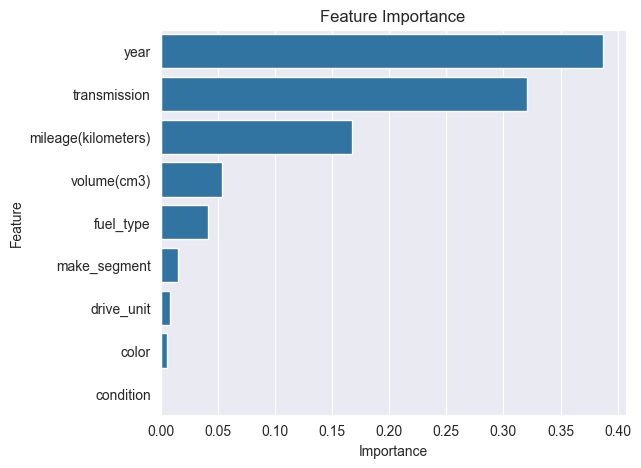

In [193]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

Conclusion

The aim of this project was to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. During the exploratory data analysis, it was found that there has been a significant increase in car prices in Belarus after the year 2000. 

The cars which runs on petrol have automatic transmission have higher price has compared to diesel cars with manual transmission. However, the elctric cars are distinctively expensive than the other cars. The cars with all wheel drive have the highest price among all the drive units. The speciality segment cars have the highest price among all the segments followed by luxury european, american, asian car segments.

The decision tree regressor model was used to predict the car price. The model was able to predict the car price with 85.29% accuracy. The most important features for predicting the car price were found to be year and volume of the engine.